<div style="text-align: center; background-color: lightblue; padding: 15px;">
    <p style="text-align: center;">بسم الله، والحمد لله، والصلاة والسلام على رسول الله وعلى آله وصحبه</p>
</div>

<div style="border: 2px solid black; padding: 10px;">
    <h2 style="text-align: center;">ADABOOST</h2>
    <p><strong>PREPARE PAR LES ELEVES INGENIEURS:</strong></p>
    <ul>
        <li>ADIL ELMISSAOUI</li>
        <li>MOHAMED EL-BADRI</li>
    </ul>
</div>

In [1]:
%reset -f

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer
import cartopy.crs as ccrs
import cartopy.feature as cfeat 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 1- Preprocessing of NetCDF files using Xarray library and conversion to DataFrame : </h4>
</div>

In [ ]:
# DATA_1=xr.open_dataset(file_link,engine='cfgrib',
#                        backend_kwargs={"filter_by_keys" : {"shortName": ["u10","v10","d2m","t2m","msl","tcc","blh","cape","tco3"]}})
# DATA_1["time"]=pd.to_datetime(DATA_1.time).normalize()

In [ ]:
# DATA_2=xr.open_dataset(file_link,engine='cfgrib',
#                       backend_kwargs={"filter_by_keys" : {"paramId":[228 ,143,142,228001]}})

# DATA_2["time"]=pd.to_datetime(DATA_2.time).normalize()

In [3]:
DATAIN="/kaggle/input/hourly-reanalysis-data-for-morocco"
file_link1=DATAIN+"/data_stream-oper_stepType-accum.nc"
file_link2=DATAIN+"/data_stream-oper_stepType-instant.nc"

In [4]:
DATA_1=xr.open_dataset(file_link1)
DATA_2=xr.open_dataset(file_link2)

In [6]:
DF_1=DATA_1.to_dataframe()

DF_2=DATA_2.to_dataframe()

DF_1.drop(columns=["number","expver"],inplace=True)

DF_2.drop(columns=["number","expver"],inplace=True)

In [8]:
DF=pd.merge(DF_1,DF_2,left_index=True, right_index=True, how='left')

In [ ]:
# DF.drop(columns=["expver_x","number_x","number_y","expver_y"],inplace=True)

In [9]:
DF

tp            cp  \
valid_time          latitude longitude                               
2024-07-01 00:00:00 40.0     -20.00     4.768372e-07  0.000000e+00   
                             -19.75     9.536743e-07  4.768372e-07   
                             -19.50     4.768372e-07  4.768372e-07   
                             -19.25     1.907349e-05  1.835823e-05   
                             -19.00     1.382828e-05  1.168251e-05   
...                                              ...           ...   
2024-09-30 23:00:00 20.0      2.00      0.000000e+00  0.000000e+00   
                              2.25      0.000000e+00  0.000000e+00   
                              2.50      0.000000e+00  0.000000e+00   
                              2.75      0.000000e+00  0.000000e+00   
                              3.00      0.000000e+00  0.000000e+00   

                                                 lsp       u10       v10  \
valid_time          latitude longitude                                     
2024-07-01 00:00:00 40.0     -20.00     4.768372e-07 -2.869888 -5.816299   
                             -19.75     4.768372e-07 -3.067154 -6.015518   
                             -19.50     0.000000e+00 -3.329849 -6.096573   
                             -19.25     4.768372e-07 -3.477310 -6.078995   
                             -19.00     1.907349e-06 -3.536880 -6.069229   
...                                              ...       ...       ...   
2024-09-30 23:00:00 20.0      2.00      0.000000e+00 -5.842407  0.208557   
                              2.25      0.000000e+00 -5.698853 -0.293396   
                              2.50      0.000000e+00 -5.430298 -0.684021   
                              2.75      0.000000e+00 -4.949829 -1.072693   
                              3.00      0.000000e+00 -4.627563 -1.371521   

                                               d2m         t2m          msl  \
valid_time          latitude longitude                                        
2024-07-01 00:00:00 40.0     -20.00     286.035645  291.378662  102749.2500   
                             -19.75     286.553223  291.425537  102731.5000   
                             -19.50     287.137207  291.411865  102715.0000   
                             -19.25     287.316895  291.345459  102699.2500   
                             -19.00     287.465332  291.273193  102684.7500   
...                                            ...         ...          ...   
2024-09-30 23:00:00 20.0      2.00      278.072754  304.687500  101030.9375   
                              2.25      277.918457  304.048828  101075.1875   
                              2.50      277.773926  303.687500  101106.1875   
                              2.75      277.715332  303.687500  101101.9375   
                              3.00      277.605957  303.781250  101087.6875   

                                             tcc         blh   cape  cin  \
valid_time          latitude longitude                                     
2024-07-01 00:00:00 40.0     -20.00     0.387207  932.052551   6.75  NaN   
                             -19.75     0.403412  874.927551  10.25  NaN   
                             -19.50     0.417297  803.177551  15.00  NaN   
                             -19.25     0.662109  802.677551  18.75  NaN   
                             -19.00     0.855743  811.927551  24.75  NaN   
...                                          ...         ...    ...  ...   
2024-09-30 23:00:00 20.0      2.00      0.000000  493.644714   0.00  NaN   
                              2.25      0.000000  479.644714   0.00  NaN   
                              2.50      0.000000  470.644714   0.00  NaN   
                              2.75      0.000000  431.269714   0.00  NaN   
                              3.00      0.000000  402.269714   0.00  NaN   

                                            tco3  
valid_time          latitude longitude            
2024-07-01 00:00:00 40.0     -2

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 2 : EDA </h4>
</div>

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 1. General EDA. </h4>
</div>

In [10]:
def EDA(DATA):
    print("this is the EDA phase \n")
    print("----------------------------------------------------------------------------------")
    print("DATA DESCRIPTION : \n")
    print(DATA.describe())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    

    print("DATA INFORMATION : \n")
    print(DATA.info())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

    print("THERE IS ANY NAN VALUE ? : \n")
    print(DATA.isnull().any())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

    print("THE NUMBER OF NAN VALUES  : \n")
    print(DATA.isnull().sum())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

    print("THERE IS ANY DUPLICATED ROWS : \n")
    print(DATA.duplicated().any())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")



    print("THE NUMBER OF DUPLICATED ROWS : \n")
    print(DATA.duplicated().sum())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")



    # print("THE VISUALIZATION IS : \n")
    # plt.figure(figsize=(25,15))
    # sns.heatmap(DATA.corr(),annot=True)
    # plt.title("CORRELATION HEATMAP")


    # plt.figure(figsize=(20,10))
    # sns.pairplot(DATA)
    # plt.title("PAIRPLOTS HEATMAP")



    # plt.figure(figsize=(20,8))
    # sns.boxplot(DATA)
    # plt.title("BOXPLOTS")

In [11]:
EDA(DF)

this is the EDA phase 

----------------------------------------------------------------------------------
DATA DESCRIPTION : 

                 tp            cp           lsp           u10           v10  \
count  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07   
mean   1.016706e-05  7.305419e-06  2.862490e-06 -8.509224e-01 -2.590449e+00   
std    1.127629e-04  9.123903e-05  4.963950e-05  3.141278e+00  3.966104e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.521875e+01 -1.680579e+01   
25%    0.000000e+00  0.000000e+00  0.000000e+00 -3.079453e+00 -5.725681e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00 -8.513336e-01 -2.498810e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  1.321671e+00  3.913574e-01   
max    1.678848e-02  1.198339e-02  1.547241e-02  1.392499e+01  1.222527e+01   

                d2m           t2m           msl           tcc           blh  \
count  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07  1.663286e+07   
me

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 2. Box Plot. </h4>
</div>

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>the dataset is too large to plot the boxplot, thus we'll take a sample and visualize the boxplot for it.
    </p>
</div>


In [13]:
min_scaler=MinMaxScaler()
DF_S=min_scaler.fit_transform(DF.loc[:,"tp":"tco3"])
DF_S=pd.DataFrame(DF_S,columns=DF.columns,index=DF.index)

<Axes: >

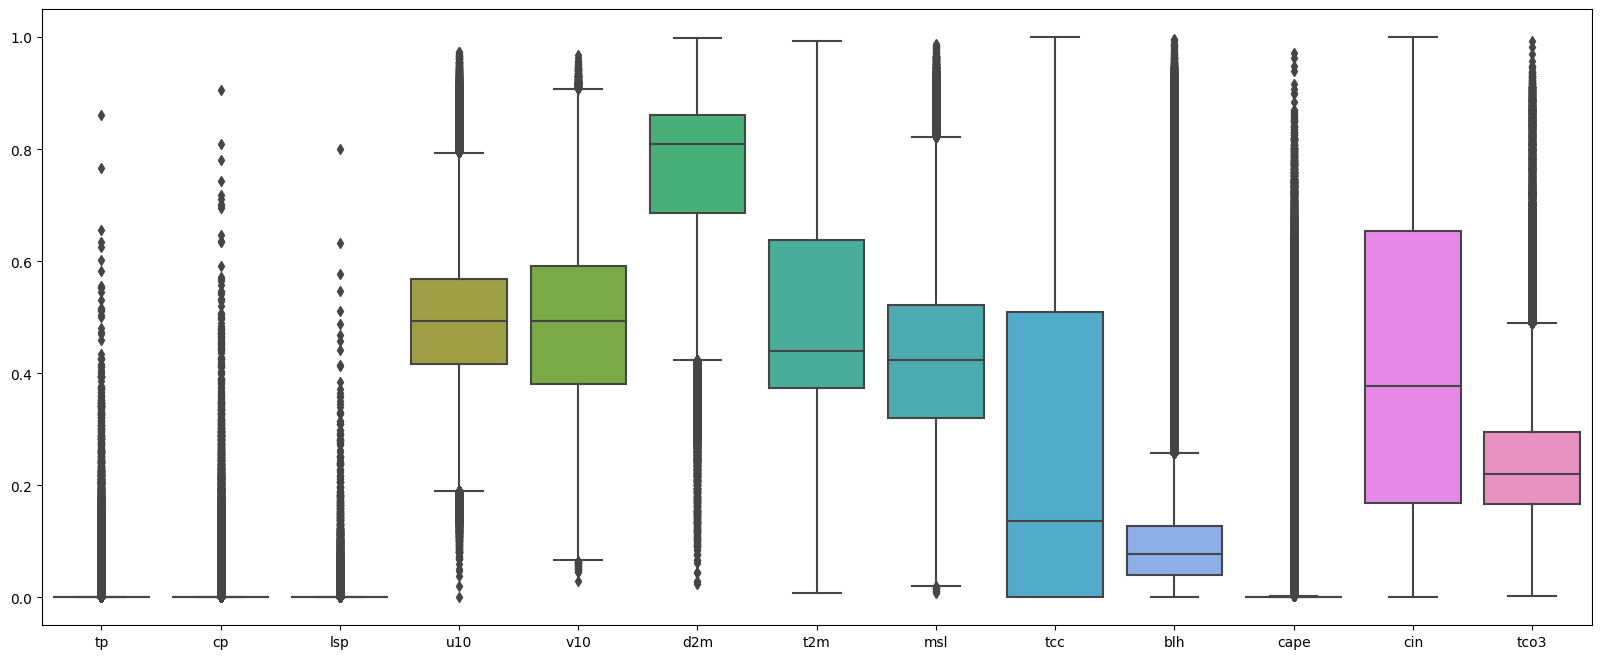

In [15]:
DF_SAMPLE=DF_S.sample(frac=0.1,random_state=1)
plt.figure(figsize=(20,8))
sns.boxplot(DF_SAMPLE)

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>
        <big> MEDIAN :</big> <br>
        <i>&bull; the Dew Point has the highest median,then high moisture content in the air.</i> <br>
        <i>&bull; the median of u10, v10 , cin and t2m indicates that the values are evenly distributed around the middle of the range (to check).</i>. <br>
        <i>&bull; Boundary Layer Height and Total Column O3 have low median and the other variables have very low median</i> <br>
        <big> OUTLIERS :</big> <br>
        <i>&bull; for tp, cp, lsp and cape, we have a lot of outliers, we can explain this by the dry climate of Morocco (low median) and the emergence of extreme events for instance thunderstorms.</i> <br>
        <i>&bull; for the blh, in general the abl tends to have lower height in cool seasons, and high heights in warm seasons, the huge number of outliers (above normal) indicates that the situation is becomming more and more warmer in morocco, thus this may raise instability.</i><br>
        <i>&bull; for the O3 the outliers are enormous, and they are positive, we can analyse this as increase in the O3 due to the pollution.</i><br>
        <big> VARIABILILITY :</big> <br>
        <i>&bull; the variability for tcc and cin is high</i> <br>
    </p>
</div>

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

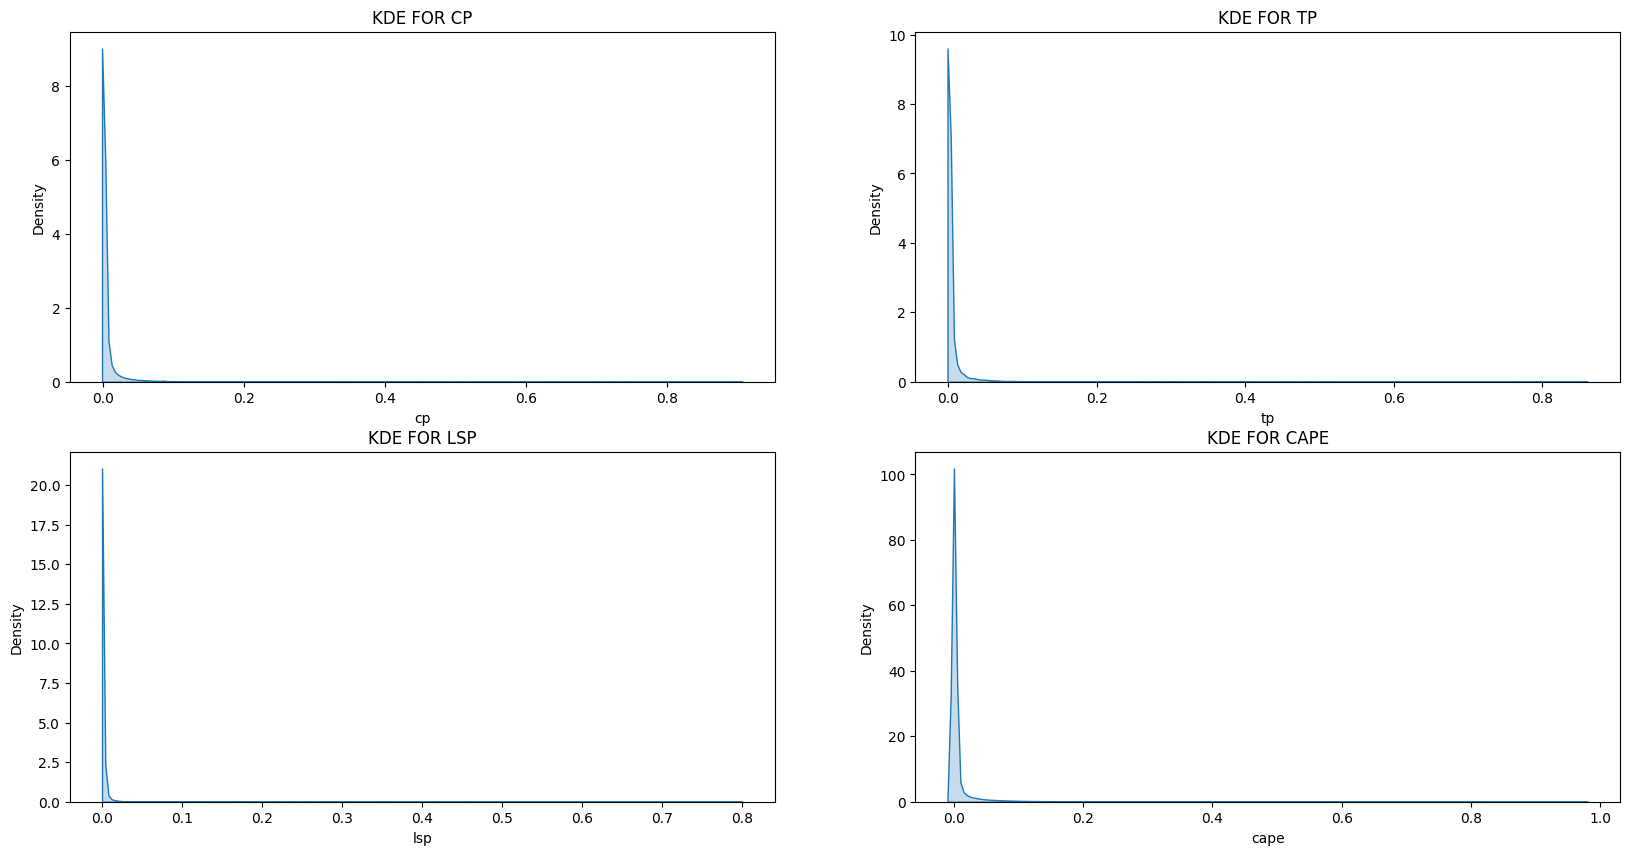

In [16]:
fig,ax=plt.subplots(figsize=(20,10),nrows=2,ncols=2)
sns.kdeplot(DF_SAMPLE["cp"],ax=ax[0,0],fill=True)
ax[0,0].set_title("KDE FOR CP")
sns.kdeplot(DF_SAMPLE["tp"],ax=ax[0,1],fill=True)
ax[0,1].set_title("KDE FOR TP")
sns.kdeplot(DF_SAMPLE["lsp"],ax=ax[1,0],fill=True)
ax[1,0].set_title("KDE FOR LSP")
sns.kdeplot(DF_SAMPLE["cape"],ax=ax[1,1],fill=True)
ax[1,1].set_title("KDE FOR CAPE")
plt.savefig("/kaggle/working/kde.png")

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>the KDE of all Convective Precipitation, Large Scale Precipitation , Total Precipitation and CAPE shows that all this "phenomena" are very rare, this results reflect perfectly the dry climate of Morocco, and the scarcity of precipitation in our counthry, thus, we understand now, why the boxplot shows a lot of outliers for this variables because of the general low frequency of this events. Then, we have to investigate more before removing outliers, it is very important to analyse whether this values are possible and then keep them, or not possible in the nature and then remove them.</p>
</div>


In [17]:
DF.describe()

,tp,cp,lsp,u10,v10,d2m,t2m,msl,tcc,blh,cape,cin,tco3
count,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,1.663286e+07,895261.000000,1.663286e+07
mean,1.016706e-05,7.305419e-06,2.862490e-06,-8.509224e-01,-2.590449e+00,2.868266e+02,3.011732e+02,1.013287e+05,2.885538e-01,8.011094e+02,8.060249e+01,418.814941,6.382773e-03
std,1.127629e-04,9.123903e-05,4.963950e-05,3.141278e+00,3.966104e+00,6.858010e+00,7.660121e+00,4.763839e+02,3.328010e-01,9.742032e+02,3.345320e+02,281.718689,2.874992e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.521875e+01,-1.680579e+01,2.435182e+02,2.780186e+02,9.989512e+04,0.000000e+00,1.021579e+01,0.000000e+00,0.000007,5.669136e-03
25%,0.000000e+00,0.000000e+00,0.000000e+00,-3.079453e+00,-5.725681e+00,2.822290e+02,2.950693e+02,1.009808e+05,0.000000e+00,2.672438e+02,0.000000e+00,169.390671,6.171357e-03
50%,0.000000e+00,0.000000e+00,0.000000e+00,-8.513336e-01,-2.498810e+00,2.892170e+02,2.980217e+02,1.013284e+05,1.366272e-01,5.092200e+02,0.000000e+00,377.296936,6.330688e-03
75%,0.000000e+00,0.000000e+00,0.000000e+00,1.321671e+00,3.913574e-01,2.920925e+02,3.070847e+02,1.016610e+05,5.107727e-01,8.340631e+02,7.250000e+00,653.218811,6.557606e-03
max,1.678848e-02,1.198339e-02,1.547241e-02,1.392499e+01,1.222527e+01,2.999563e+02,3.235752e+02,1.032795e+05,1.000000e+00,6.505979e+03,5.959750e+03,999.984558,8.671738e-03


<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>hint the unit of the precipitation is m, and the unit of CAPE is (J kg**-1).<p>

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 3.Heatmap </h4>
</div>

## General Analysis 

<Axes: >

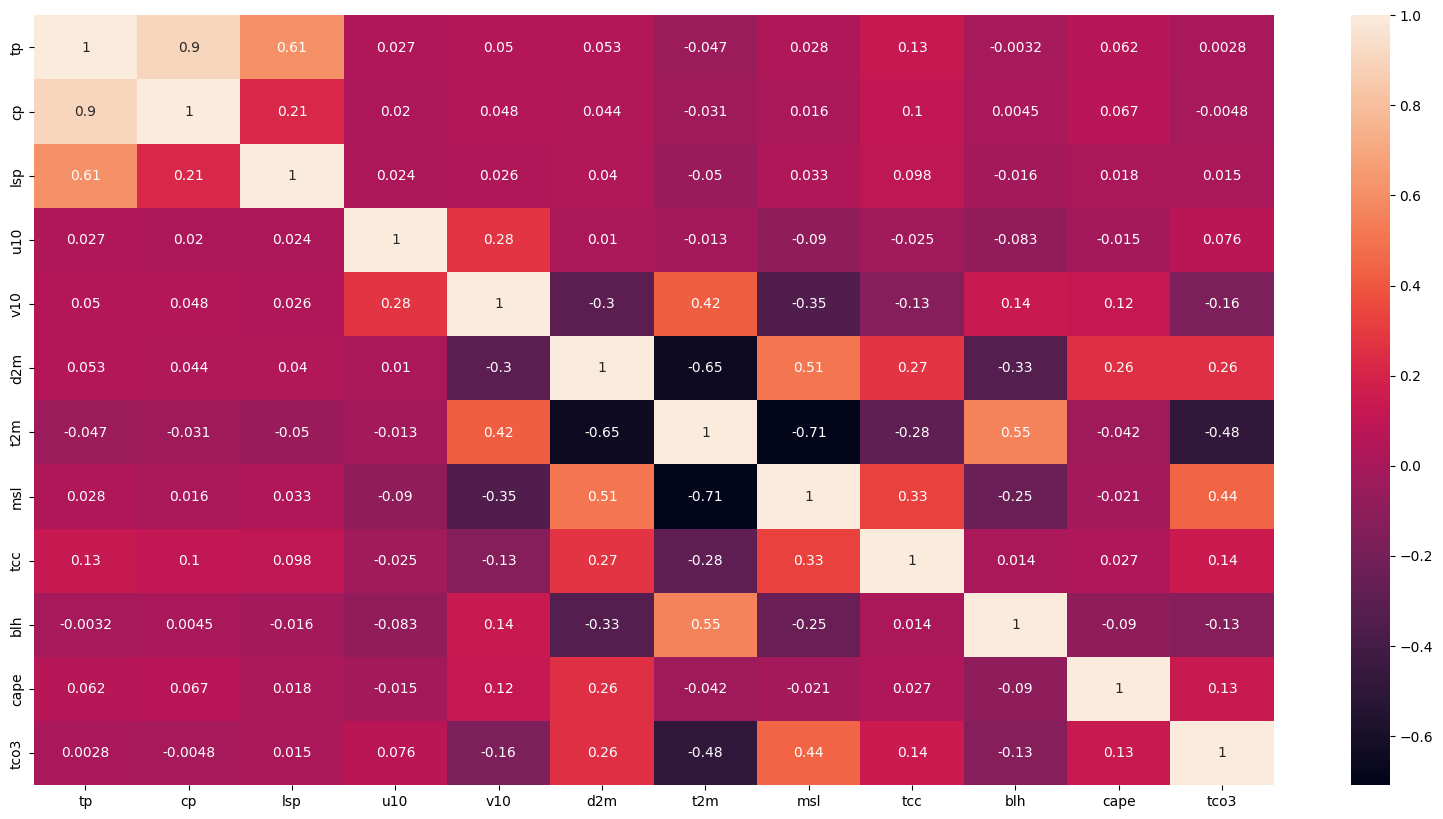

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(DF.corr(),annot=True)

<Axes: >

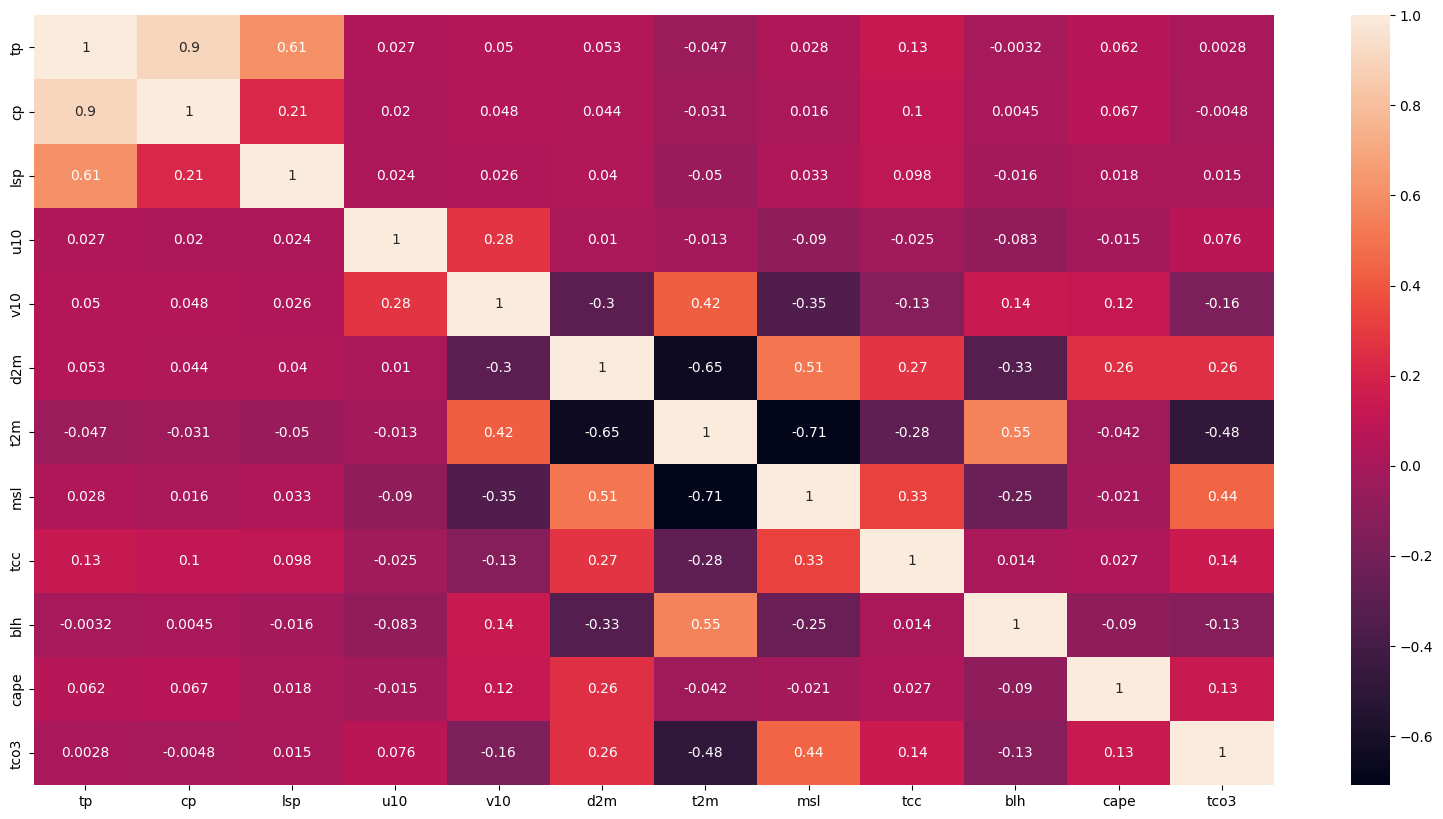

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(DF_S.corr(),annot=True)

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>
        <big> Positive correlation :</big> <br>
        <i>&bull; Convective Precipitation and Total Precipitation (0.9)</i> <br>
        <i>&bull; Large Scale Precipitation and Total Precipitation (0.61)</i>. <br>
        <i>&bull; Total Column Ozone and msl (0.44)</i> <br>
        <i>&bull; 2 meter temperature and V10 (0.42)</i> <br>
        <i>&bull; 2 meter temperature and Boundary Layer Height(0.55)</i> <br>
        <big> Negative correlation :</big><br>
        <i>&bull; msl and 2 meter temperature (-0.71)</i><br>
        <i>&bull; Dew point and 2 meter temperature (-0.65)</i><br>
        <i>&bull; Total Column Ozone and 2 meter temperature (-0.48)</i> <br>
    </p>
</div>


## ANALYSIS PER VALUE OF THE CAPE.

<Axes: >

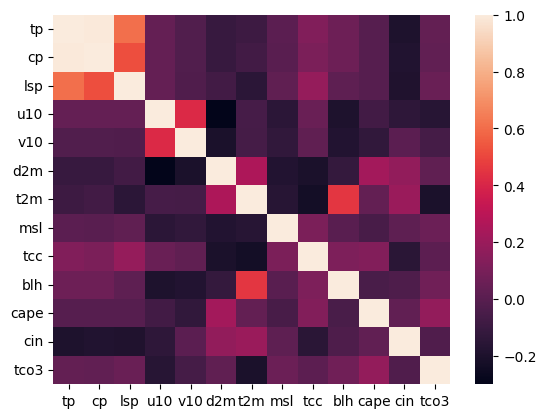

In [7]:
x=2000
sns.heatmap(DF.query("cape >= @x").corr())

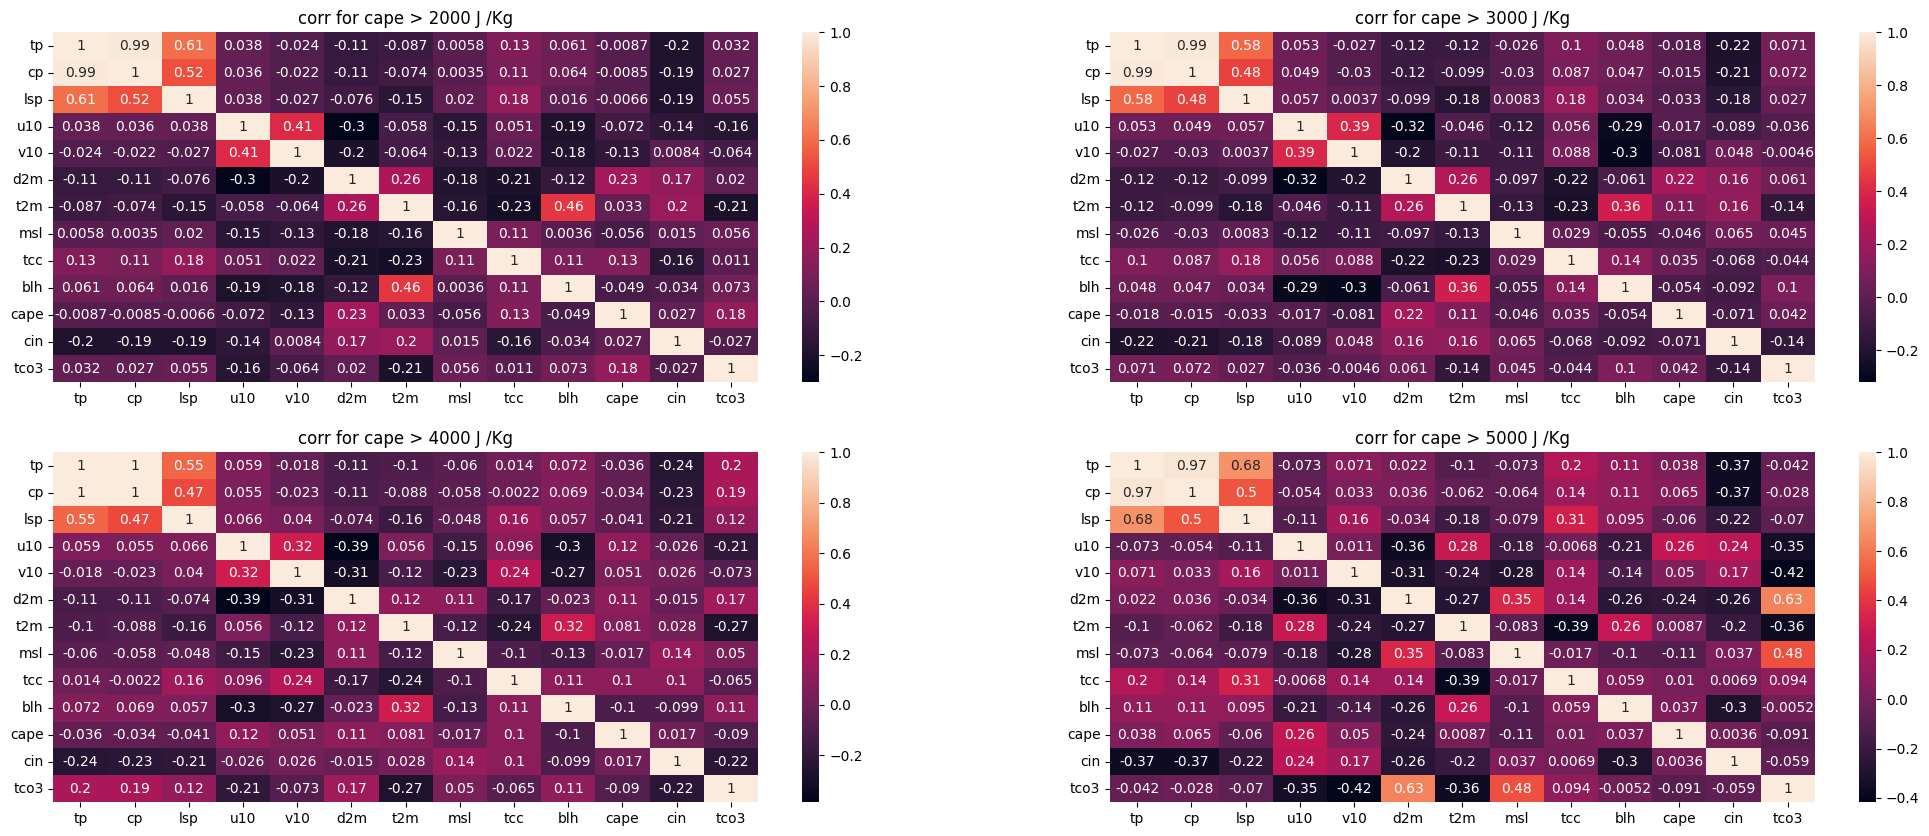

In [8]:
fig,ax=plt.subplots(figsize=(25,10),ncols=2,nrows=2)
ax=ax.flatten()
for i,cape in enumerate([2000,3000,4000,5000]) : 
    temp=DF.query("cape >= @cape").corr()
    sns.heatmap(data=temp,annot=True,ax=ax[i])
    ax[i].set_title(f"corr for cape > {cape} J /Kg")

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>The plots above show an important result, when we filter the data by THRESHOLDS of cape, we discover changes in the correlation heatmap. Thus,the correlation between d2m and tco3 henceforth 0.63, also the correlation between trco3 and msl became 0.48 for cape > 5000 j kg -1, for this Threshold, also the correlation between tp and lsp henceforth higher (0.68). 
    </p>
</div>


<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 3. Clean the Data </h4>
</div>

In [9]:
print("the % of nan in cin is :" , 100*DF.cin.isnull().sum()/len(DF),"%" )

the % of nan in cin is : 94.61751746422023 %


<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>for the CIN, we found that 95% of cin is nan, so we'll drop this variable insteade of dropping 95% of the dataset
    </p>
</div>


In [10]:
DF.drop(columns="cin",inplace=True)
DF_S.drop(columns="cin",inplace=True)

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 4. Spacial Analysis</h4>
</div>

In [11]:
def plot_space(data,var,thres):
    fig, ax=plt.subplots(figsize=(25,10),ncols=2,subplot_kw={"projection" : ccrs.PlateCarree()})
    if thres == None : 
        data=data
        complete=f"{var}"
    else :
        data=data.where(data[var]>thres)
        complete=f"{var} > {thres}"
    
    data[var].mean(dim="valid_time").plot(ax=ax[0],transform=ccrs.PlateCarree())
    
    ax[0].set_title(f"the mean of {complete}")
    ax[0].coastlines()


    data[var].std(dim="valid_time").plot(ax=ax[1])
    ax[1].set_title(f"the std for {complete}")
    ax[1].coastlines()
    plt.savefig(f"/kaggle/working/{var}_{thres}.png")

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


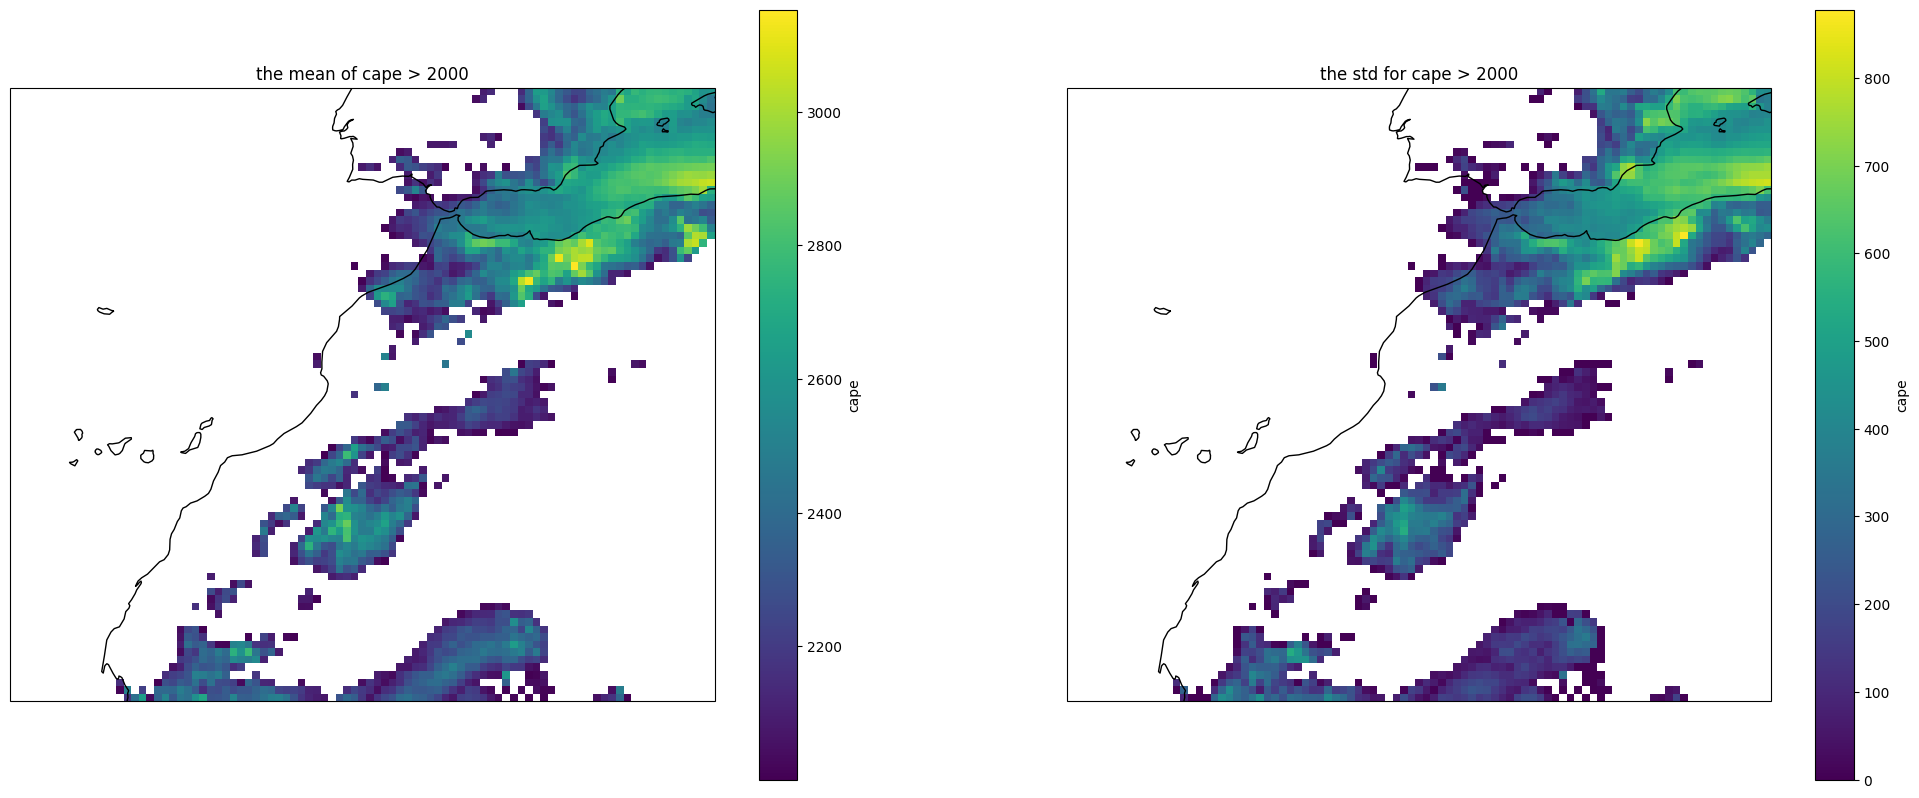

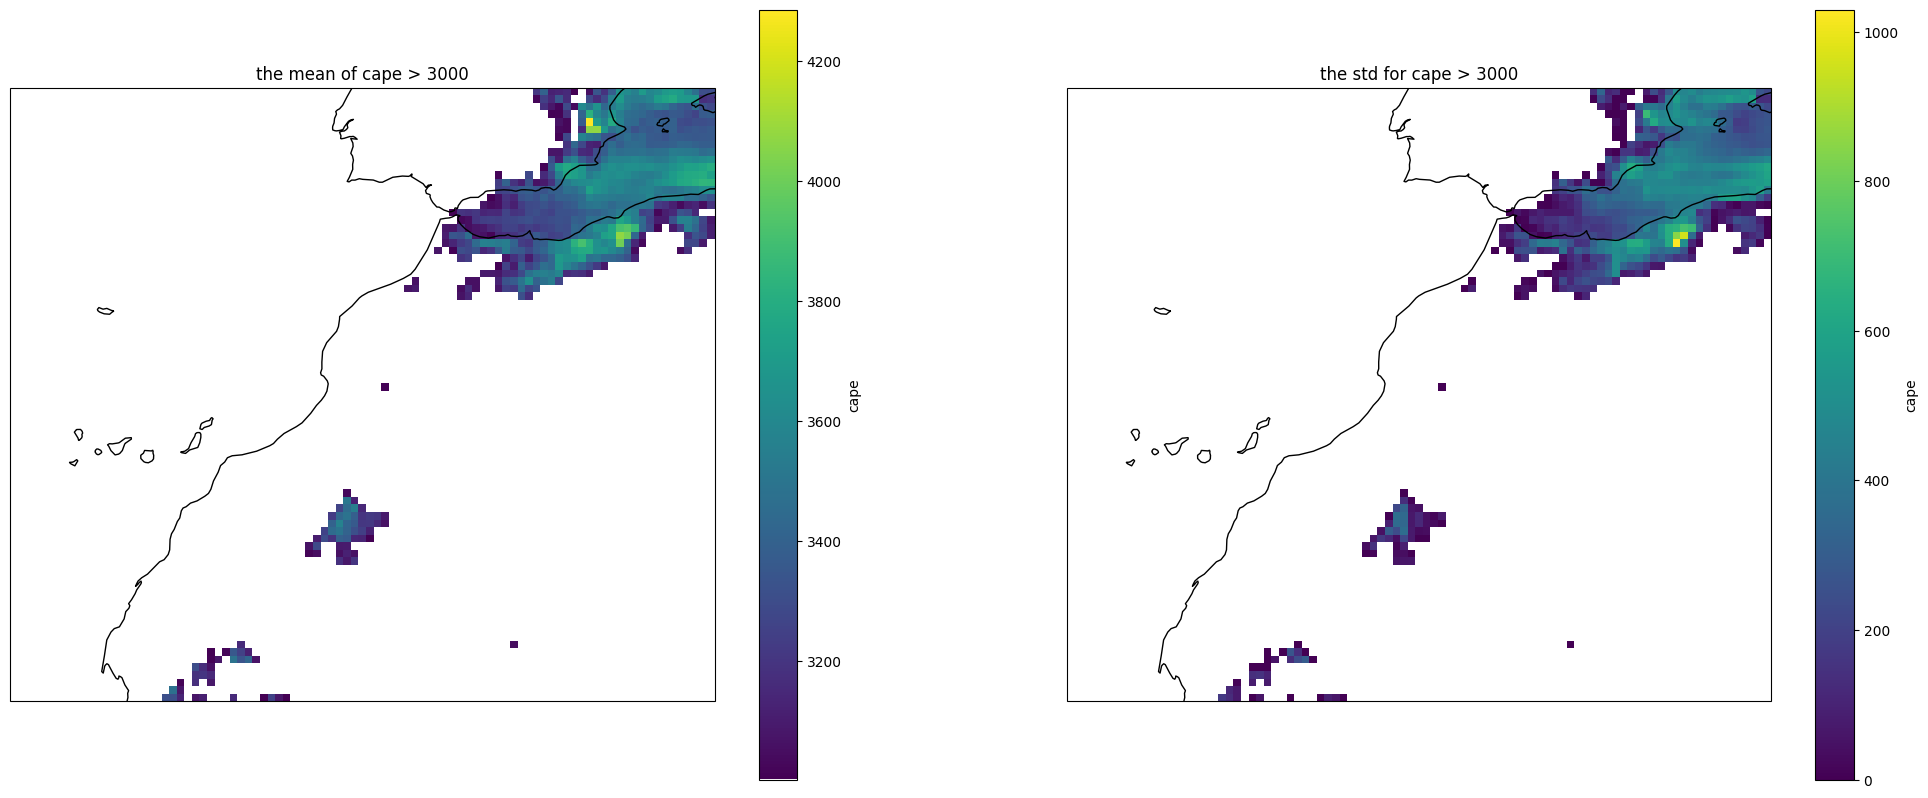

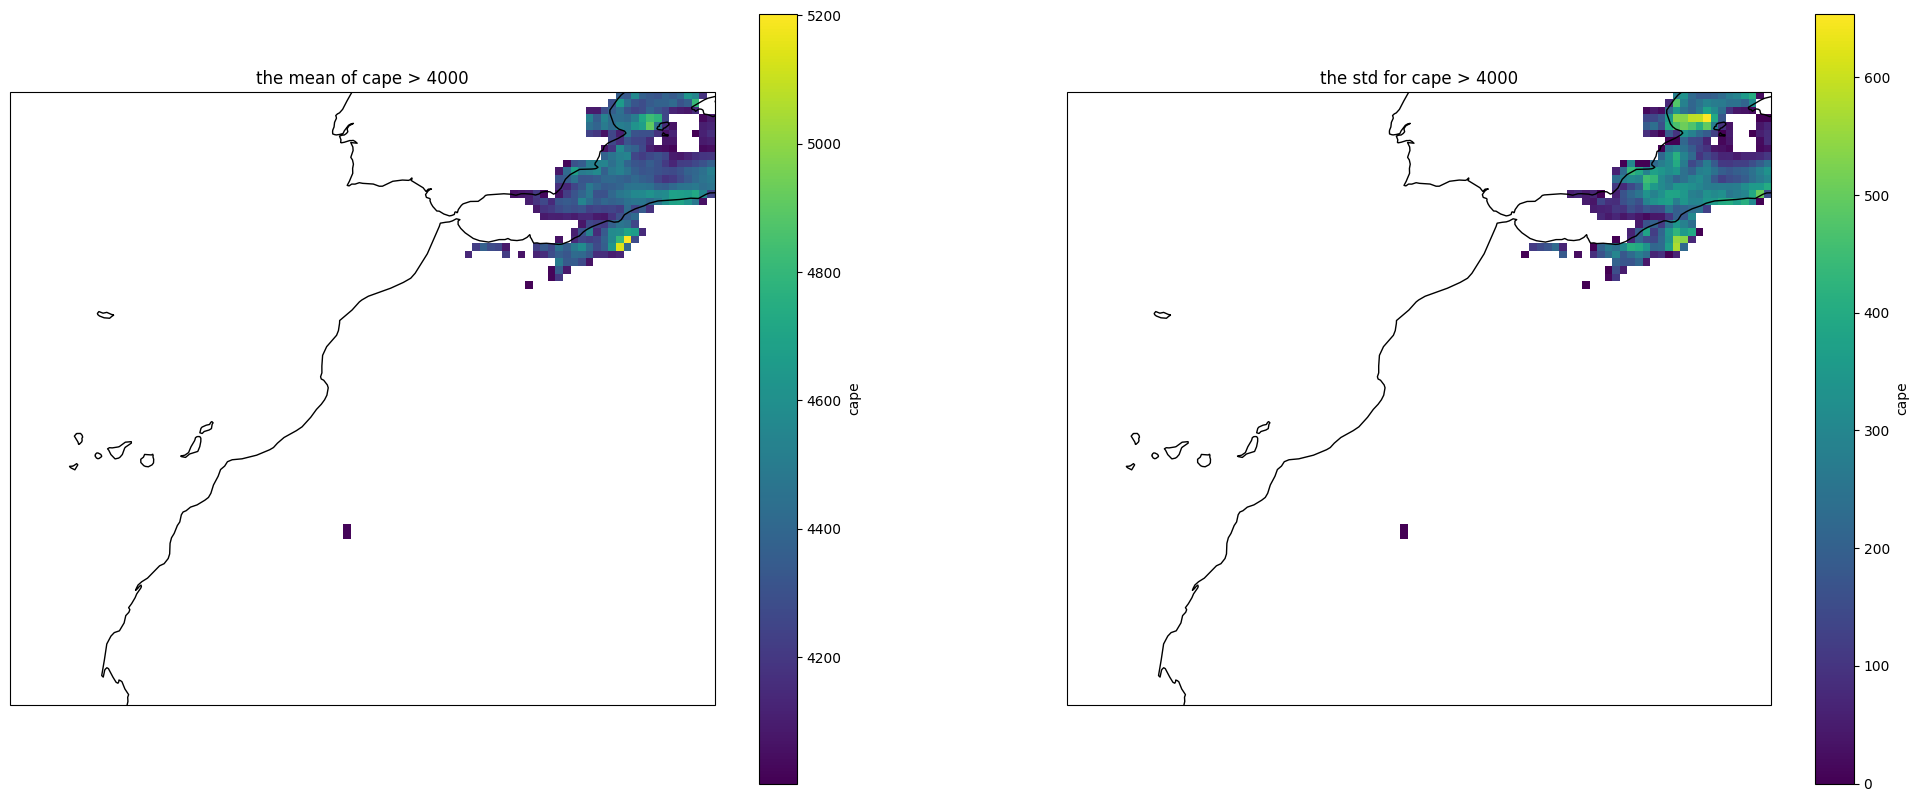

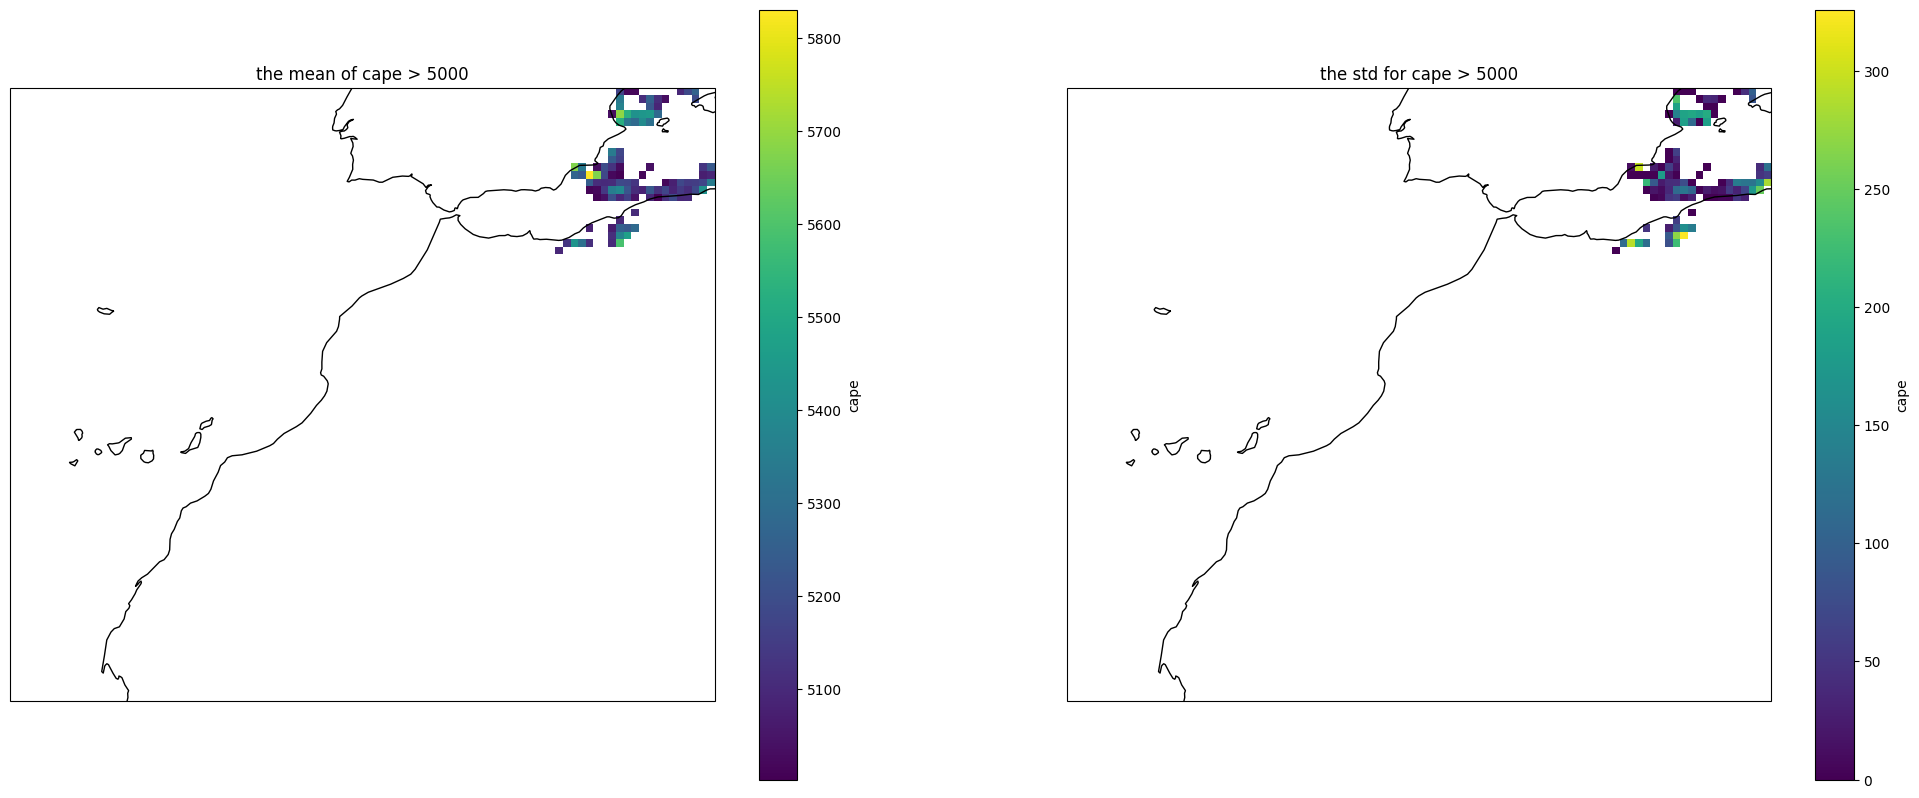

In [12]:
for thres in [2000,3000,4000,5000]:
    plot_space(DATA_2,"cape",thres)

In [ ]:
plot_space(DATA_1,"cp",None)

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 3- Features Engineering, Encoding and Data Preprocessing if necessary: </h4>
</div>

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 2. Scaling the Data.</h4>
</div>

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p> the data is already scaled in the EDA part (Min Max Scaler).
    </p>
</div>


<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 4. Analysis Per Category Of the CAPE.</h4>
</div>

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>already done in EDA.
    </p>
</div>


<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 5. Feature selection.</h4>
</div>

## FORWARD STEPWIZE.

In [15]:
model = LinearRegression()
sfs = SFS(model, 
          k_features='best',  # You can also set this to a specific number like 5
          forward=True, # we put it on false for backward
          floating=False, # false for backward and true for stepwise 
          scoring='r2', 
          cv=5)  # the number of cross-validation folds.

temp=DF.dropna()
X_train = temp.drop(columns=["cp"])
y_train = temp["cp"]
sfs = sfs.fit(X_train, y_train)
selected_features = np.array(sfs.k_feature_names_)
print(f"Selected features FORWARD: {selected_features}")

Selected features FORWARD: None



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 6. Resampling the data </h4>
</div>

<div style="border: 1px dashed navy; padding: 10px; background-color: transparent; color: navy;">
    <p>First we have to resalmple the data, we can't deal with the current resoltution, so we'll slice the data to be able to run the model.
    </p>
</div>


In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [20]:
data1=DATA_1.where(  (DATA_1["latitude"] >28)  & ( DATA_1["latitude"] < 32) & (DATA_1["longitude"] <0) & (DATA_1["longitude"] > -8) ,drop=True)
data2=DATA_2.where(  (DATA_2["latitude"] >28)  & ( DATA_2["latitude"] < 32) & (DATA_2["longitude"] <0) & (DATA_2["longitude"] > -8) ,drop=True)

In [21]:
data1=data1.isel(longitude= slice(None,None,2), latitude = slice (None,None,2))
data2=data2.isel(longitude= slice(None,None,2), latitude = slice (None,None,2))

In [22]:
df_1=data1.to_dataframe()

df_2=data2.to_dataframe()

df_1.drop(columns=["number","expver"],inplace=True)

df_2.drop(columns=["number","expver"],inplace=True)

df_resampled=pd.merge(df_1,df_2,left_index=True, right_index=True, how='left')

In [25]:
df_resampled=df_resampled.drop(columns=["cin"])

In [26]:
min_scaler=MinMaxScaler()
df_s=min_scaler.fit_transform(df_resampled)
df_s=pd.DataFrame(df_s,columns=df_resampled.columns,index=df_resampled.index)

## LASSO

In [28]:
temp=df_s.dropna()
X = temp.drop(columns=['tp', 'cp'])

# La variable dépendante pour 'tp'
y_tp = temp['tp']

# La variable dépendante pour 'cp'
y_cp = temp['cp']

# Sélection des variables pour prédire 'tp'
# Diviser les données en ensembles d'entraînement et de test pour 'tp'
X_train_tp, X_test_tp, y_train_tp, y_test_tp = train_test_split(X, y_tp, test_size=0.2, random_state=42)
X_train_cp, X_test_cp, y_train_cp, y_test_cp = train_test_split(X, y_cp, test_size=0.2, random_state=42)


# Utiliser la régression Lasso avec validation croisée pour sélectionner les variables importantes pour 'tp'
# LassoCV effectue une validation croisée pour trouver le meilleur paramètre de régularisation alpha
lasso_tp = LassoCV(cv=10, random_state=42).fit(X_train_tp, y_train_tp)
lasso_cp = LassoCV(cv=10, random_state=42).fit(X_train_cp, y_train_cp)


# Obtenir les coefficients des variables sélectionnées par Lasso pour 'tp'
importance_tp = lasso_tp.coef_
importance_cp = lasso_cp.coef_

# Sélectionner les noms des variables avec des coefficients non nuls
selected_features_tp = X.columns[(importance_tp != 0)]
selected_features_cp = X.columns[(importance_cp != 0)]
# Afficher les variables sélectionnées pour 'tp'
print("Variables sélectionnées pour 'tp':", selected_features_tp)
print("Variables sélectionnées pour 'cp':", selected_features_cp)

Variables sélectionnées pour 'tp': Index(['lsp', 'u10', 'v10', 'd2m', 't2m', 'msl', 'tcc', 'blh', 'cape', 'tco3'], dtype='object')
Variables sélectionnées pour 'cp': Index(['lsp', 'u10', 'v10', 'd2m', 't2m', 'msl', 'tcc', 'blh', 'cape', 'tco3'], dtype='object')


## FORWARD STEPWIZE

In [29]:
model = LinearRegression()
sfs = SFS(model, 
          k_features='best',  # You can also set this to a specific number like 5
          forward=True, # we put it on false for backward
          floating=False, # false for backward and true for stepwise 
          scoring='r2', 
          cv=5)  # the number of cross-validation folds.

temp=df_s.dropna()
X_train = temp.drop(columns=["cp","tp"])
y_train = temp["cp"]
sfs = sfs.fit(X_train, y_train)
selected_features = np.array(sfs.k_feature_names_)
print(f"Selected features FORWARD for CP are : {selected_features}")

Selected features FORWARD for CP are : ['lsp' 'cape']


In [30]:
X_train = temp.drop(columns=["tp","cp"])
y_train = temp["tp"]
sfs = sfs.fit(X_train, y_train)
selected_features = np.array(sfs.k_feature_names_)
print(f"Selected features FORWARD for TP are : {selected_features}")

Selected features FORWARD for TP are : ['lsp' 'cape']


<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 6- Algorithms Hyper-parameters tunning using grid-search process or something else. </h4>
</div>

<div class="note" style="background-color: navy; color: yellow; padding: 10px;">
  <h4> 1. T P </h4>
</div>

In [132]:
# selected_features_tp=pd.Index(['lsp' ,'u10' ,'v10' ,'d2m', 'tco3'])

In [ ]:
# Convertir la colonne 'time' en datetime
temp=df_s.dropna()
train_tp, test_tp = train_test_split(temp[selected_features_tp.append(pd.Index(["tp"]))], test_size=0.2, random_state=42)
train_tp['time'] = pd.to_datetime(train_tp.reset_index().valid_time.values)
test_tp['time'] = pd.to_datetime(test_tp.reset_index().valid_time.values)
# train_cp['time'] = pd.to_datetime(train_cp['valid_time'])
# test_cp['time'] = pd.to_datetime(test_cp['valid_time'])

# Sélectionner les colonnes d'entrée et la colonne cible
features_tp = selected_features_tp
target = 'tp'

# Séparer les données en ensembles d'entraînement et de test
X_train_tp = train_tp[features_tp]
y_train_tp = train_tp[target]
X_test_tp = test_tp[features_tp]
y_test_tp = test_tp[target]


# features_cp = selected_features_cp
# target = 'cp'
# X_train_cp = train_cp[features_cp]
# y_train_cp = train_cp[target]
# X_test_cp = test_cp[features_cp]
# y_test_cp = test_cp[target]

# 1. Algorithms Hyper-parameters tuning using grid-search process
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# GridSearchCV pour tp
grid_search_tp = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_tp.fit(X_train_tp, y_train_tp)
best_params_tp = grid_search_tp.best_params_
print("Best parameters for tp:", best_params_tp)

In [31]:


# 2. Cross Validation
# Cross-validation pour tp
cv_scores_tp = cross_val_score(AdaBoostRegressor(**best_params_tp), X_train_tp, y_train_tp, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores for tp:", -cv_scores_tp)



# 3. Final verification with scores of regression
# Entraîner le modèle final pour tp
final_model_tp = AdaBoostRegressor(**best_params_tp)
final_model_tp.fit(X_train_tp, y_train_tp)


y_pred_tp = final_model_tp.predict(X_test_tp)
mse_tp = mean_squared_error(y_test_tp, y_pred_tp)
r2_tp = r2_score(y_test_tp, y_pred_tp)
print(f"Final MSE for tp: {mse_tp}, R2 score: {r2_tp}")



# 4. Final focus section with visualization driven over the September Month of 2024
# Filtrer les données pour le mois de septembre 2024
september_2024_tp = test_tp[(test_tp['time'] >= '2024-09-01') & (test_tp['time'] < '2024-10-01')]


# Prédictions pour septembre 2024
september_preds_tp = final_model_tp.predict(september_2024_tp[features_tp])


# Visualisation des prédictions pour tp
plt.figure(figsize=(12, 6))
plt.scatter(september_2024_tp['time'], september_2024_tp[target], label='Actual tp')
plt.scatter(september_2024_tp['time'], september_preds_tp, label='Predicted tp', linestyle='--')
plt.xlabel('Time')
plt.ylabel('tp')
plt.title('Actual vs Predicted tp for September 2024')
plt.legend()
plt.xticks(rotation=45)
plt.show()

NameError: name 'best_params_tp' is not defined

Cross-validation scores for tp: [2.22804876e-07 1.69274224e-07 1.72829297e-07 2.12415173e-07
 1.91870850e-07]
Final MSE for tp: 1.9047950564697025e-07, R2 score: 0.4944478008323375


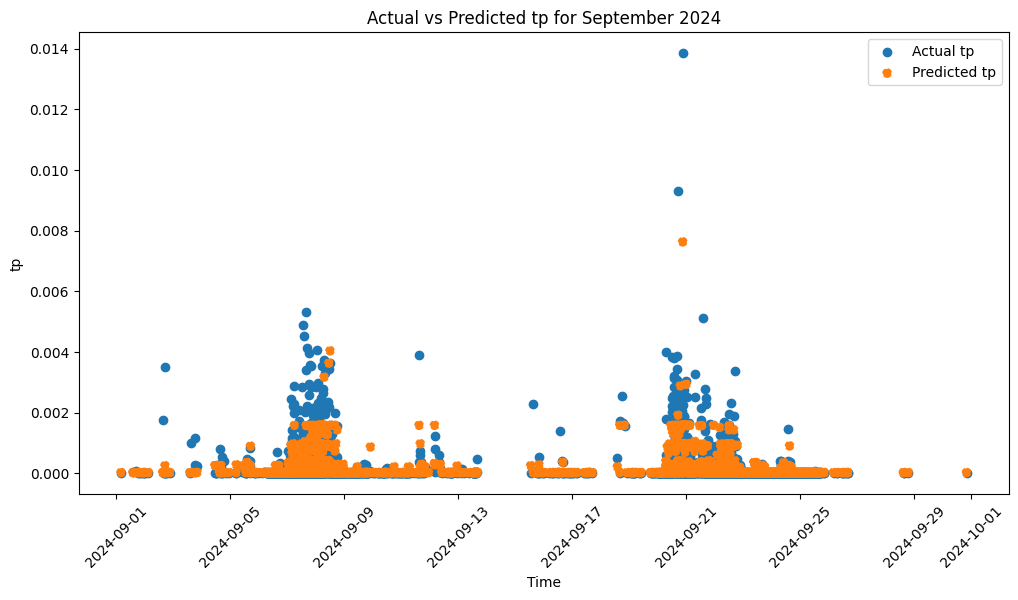

In [145]:


# 2. Cross Validation
# Cross-validation pour tp
cv_scores_tp = cross_val_score(AdaBoostRegressor(**best_params_tp), X_train_tp, y_train_tp, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores for tp:", -cv_scores_tp)



# 3. Final verification with scores of regression
# Entraîner le modèle final pour tp
final_model_tp = AdaBoostRegressor(**best_params_tp)
final_model_tp.fit(X_train_tp, y_train_tp)


y_pred_tp = final_model_tp.predict(X_test_tp)
mse_tp = mean_squared_error(y_test_tp, y_pred_tp)
r2_tp = r2_score(y_test_tp, y_pred_tp)
print(f"Final MSE for tp: {mse_tp}, R2 score: {r2_tp}")



# 4. Final focus section with visualization driven over the September Month of 2024
# Filtrer les données pour le mois de septembre 2024
september_2024_tp = test_tp[(test_tp['time'] >= '2024-09-01') & (test_tp['time'] < '2024-10-01')]


# Prédictions pour septembre 2024
september_preds_tp = final_model_tp.predict(september_2024_tp[features_tp])


# Visualisation des prédictions pour tp
plt.figure(figsize=(12, 6))
plt.scatter(september_2024_tp['time'], september_2024_tp[target], label='Actual tp')
plt.scatter(september_2024_tp['time'], september_preds_tp, label='Predicted tp', linestyle='--')
plt.xlabel('Time')
plt.ylabel('tp')
plt.title('Actual vs Predicted tp for September 2024')
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [ ]:
# GridSearchCV pour cp
grid_search_cp = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_cp.fit(X_train_cp, y_train_cp)
best_params_cp = grid_search_cp.best_params_
print("Best parameters for cp:", best_params_cp)

# # Cross-validation pour cp
cv_scores_cp = cross_val_score(AdaBoostRegressor(**best_params_cp), X_train_cp, y_train_cp, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores for cp:", -cv_scores_cp)

# Entraîner le modèle final pour cp
final_model_cp = AdaBoostRegressor(**best_params_cp)
final_model_cp.fit(X_train_cp, y_train_cp)
y_pred_cp = final_model_cp.predict(X_test_cp)
mse_cp = mean_squared_error(y_test_cp, y_pred_cp)
r2_cp = r2_score(y_test_cp, y_pred_cp)
print(f"Final MSE for cp: {mse_cp}, R2 score: {r2_cp}")

september_2024_cp = test_cp[(test_cp['time'] >= '2024-09-01') & (test_cp['time'] < '2024-10-01')]

september_preds_cp = final_model_cp.predict(september_2024_cp[features_cp])

# # Visualisation des prédictions pour cp
plt.figure(figsize=(12, 6))
plt.plot(september_2024_cp['time'], september_2024_cp[target], label='Actual cp')
plt.plot(september_2024_cp['time'], september_preds_cp, label='Predicted cp', linestyle='--')
plt.xlabel('Time')
plt.ylabel('cp')
plt.title('Actual vs Predicted cp for September 2024')
plt.legend()
plt.show()

In [ ]:
# data1=DATA_1.where(  (DATA_1["latitude"] >28)  & ( DATA_1["latitude"] < 32) & (DATA_1["longitude"] <0) & (DATA_1["longitude"] > -8) ,drop=True)
# data2=DATA_2.where(  (DATA_2["latitude"] >28)  & ( DATA_2["latitude"] < 32) & (DATA_2["longitude"] <0) & (DATA_2["longitude"] > -8) ,drop=True)

In [114]:
# DATA_1.valid_time

<xarray.DataArray 'valid_time' (valid_time: 2208)> Size: 18kB
array(['2024-07-01T00:00:00.000000000', '2024-07-01T01:00:00.000000000',
       '2024-07-01T02:00:00.000000000', ..., '2024-09-30T21:00:00.000000000',
       '2024-09-30T22:00:00.000000000', '2024-09-30T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 18kB 2024-07-01 ... 2024-09-30T23...
    expver      (valid_time) <U4 35kB '0001' '0001' '0001' ... '0001' '0001'
Attributes:
    long_name:      time
    standard_name:  time

In [1]:
df_resampled["cape_cat"]=pd.cut(df_resampled["cape"],bins=[0,2000,4000,5000,np.inf],labels=["[0 - 2000]","[2000 - 4000]","[4000-5000]","[ > 5000]"],include_lowest=True)
# DF_S["cape_cat"]=DF["cape_cat"]

NameError: name 'pd' is not defined

In [ ]:
sns.lineplot(data=DF,x=DF.index,y="cp",hue="cape_cat")

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 4- Features Selection. </h4>
</div>

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> TASK 5- Train-Test Splitting: </h4>
</div>

<div class="note" style="background-color: green; color: white; padding: 10px;">
  <h4>HINT : THIS PART IS CORRECTED AFTER THE VERIFICATION OF THE PROFESSOR </h4>
</div>